In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
url = "https://www.airlinequality.com/airline-reviews/batik-air"

In [3]:
list_review = []

for page in range(1,3):
    page_url = f"{url}/page/{page}/?sortby=post_date%3ADesc&pagesize=100"
    response = requests.get(page_url)
    website_html = response.text
    soup = BeautifulSoup(website_html, "html.parser")
    
    reviews = soup.find_all(name="h2", class_="text_header")
    list_review.append([review.getText() for review in reviews])

In [6]:
review = []

for n in range(2):
    for i in list_review[n]:
        review.append(i)

In [7]:
batik = pd.DataFrame(data={'reviews':review})

In [8]:
batik.sample(5)

,reviews
120,"""unfresh hotdog for dinner"""
76,"""never fly with them again"""
50,"""worst airline I've ever used"""
53,"""Moved flight three times"""
1,"""I had no major problems with them"""


In [9]:
batik['reviews'] = batik['reviews'].str.replace('"', '')
batik['reviews'] = batik['reviews'].str.lower()

In [10]:
batik.sample(5)

,reviews
98,how low the price was
10,worst airline service ever
53,moved flight three times
16,the crew did an amazing job
106,would never recommend them


In [14]:
sentiment_store = []
analyzer = SentimentIntensityAnalyzer()

for one_review in batik['reviews']:
    sentiment = analyzer.polarity_scores(one_review)
    if sentiment['compound'] > 0:
        sentiment_analysis = "positive"
    elif sentiment['compound'] == 0:
        sentiment_analysis = "neutral"
    elif sentiment['compound'] < 0:
        sentiment_analysis = "negative"
    
    sentiment_store.append(sentiment_analysis)

batik['sentiment'] = pd.Series(sentiment_store)

In [20]:
batik.sample(10)

,reviews,sentiment
135,a very pleasant experience,positive
117,disaster begin at check in,negative
125,good cabin crew,positive
29,very disappointed,negative
20,poor inflight service,negative
118,recommend batik air,positive
5,the crew looked fatigued,negative
108,luggage shell is broken,negative
139,first and last time,neutral
50,worst airline i've ever used,negative


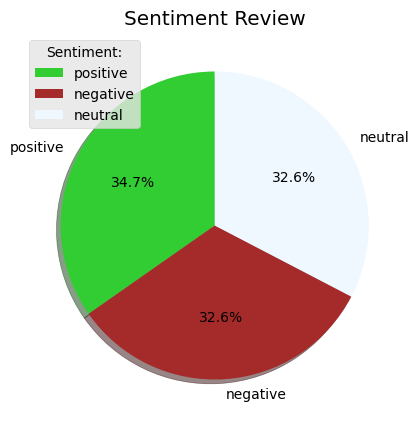

In [18]:
sentiment_pie = batik['sentiment'].value_counts()
label = ['positive', 'negative','neutral']
colors = ['limegreen','brown','aliceblue']

plt.figure(figsize = (10,5))
plt.title('Sentiment Review')
plt.pie(sentiment_pie, labels=label, startangle=90, shadow=True, autopct="%1.1f%%", colors=colors)
plt.legend(title='Sentiment:')
plt.show()

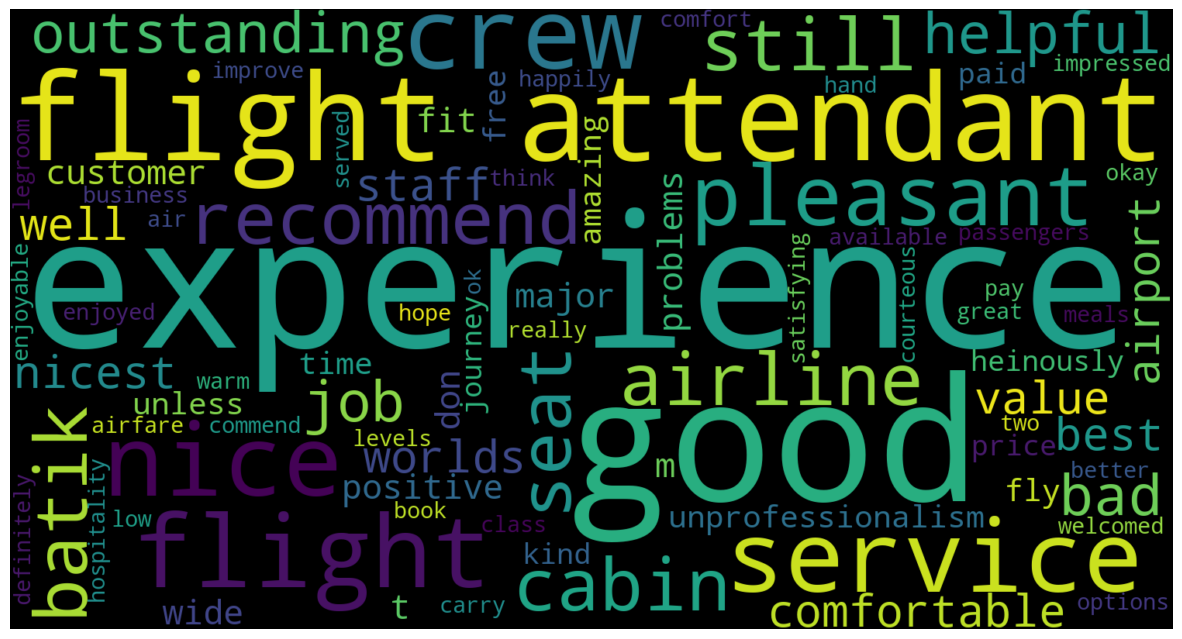

In [19]:
plt.figure(figsize = (15,10))

cloud_word = ' '.join(batik[batik['sentiment'] == 'positive']['reviews'])
cloud = WordCloud(min_font_size = 7, height = 800, width = 1500).generate(cloud_word)

plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()